# Alpha Experiment

python -m grid results_alpha4 "python automatic_data_generation/train_and_eval_cvae.py --dataset-size 200 --none-type snips-dump -ep 50" --alpha:float 0.0 0.1 0.2 0.5 1.0 2.0 5.0 --none-size 200 --seed 1 2 3 4 5 --infersent-selection:str supervised unsupervised --cosine-threshold 0 0.5 0.9 --n 3

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import json
import torchtext
import torch.nn as nn
import nltk
import pandas as pd

nltk.download('punkt')
cmap = plt.get_cmap('viridis')
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicecoucke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
results_dir = '/Users/alicecoucke/Snips/automatic-data-generation/results_alpha5'
save_dir = '/Users/alicecoucke/Snips/automatic-data-generation/results_alpha5/fig'

from pathlib import Path
import shutil
runs = []

for filename in os.listdir(results_dir):
    filepath = Path(results_dir)/Path(filename)
    if filename.endswith('.pkl'):
        runs.append(torch.load(filepath, map_location='cpu'))
        
runs = [run for run in runs if (run['args']['infersent_selection']=='unsupervised')]
runs = [run for run in runs if (run['args']['cosine_threshold']==0.9)]
#runs = [run for run in runs if (run['args']['alpha']==0.5)]

runs.sort(key = lambda x : x['args']['seed'])
runs.sort(key = lambda x : x['args']['none_size'])
runs.sort(key = lambda x : x['args']['cosine_threshold'])
runs.sort(key = lambda x : x['args']['alpha'])
        
data = {}
for arg_name in runs[0]['args'].keys():
    data[arg_name] = [run['args'][arg_name] for run in runs]
data['pickle']   = np.array([run['args']['pickle'].split('/')[-1].rstrip('.pkl') for run in runs])
    
data['bleu_quality']   = np.array([run['delexicalised_metrics']['bleu_scores']['quality']['avg'] for run in runs])
data['bleu_diversity'] = np.array([run['delexicalised_metrics']['bleu_scores']['diversity']['avg'] for run in runs])
data['accuracy']       = np.array([run['delexicalised_metrics']['intent_accuracy']['avg'] for run in runs])
data['originality']       = np.array([run['delexicalised_metrics']['originality']['avg'] for run in runs])
data['transfer']   = np.array([run['delexicalised_metrics']['transfer']['metric']['avg'] for run in runs])

data['metric'] = data['accuracy']**10 * data['originality'] #* data['bleu_quality']

df = pd.DataFrame(data, columns=['pickle', 'n_epochs', 'seed', 'dataset_size', 'none_size', 'alpha', 'cosine_threshold',
                                 'bleu_quality', 'bleu_diversity', 'accuracy', 'originality', 'transfer', 'metric'])
#df = df.sort_values(by = 'alpha', ascending=True)
print(len(runs))
df.head(1000)

35


,pickle,n_epochs,seed,dataset_size,none_size,alpha,cosine_threshold,bleu_quality,bleu_diversity,accuracy,originality,transfer,metric
0,02397,50,1,200,200,0.0,0.9,0.640723,0.217274,0.941392,0.371881,0.194751,0.203286
1,42554,50,2,200,200,0.0,0.9,0.609061,0.182522,0.842115,0.391787,0.216016,0.070269
2,35322,50,3,200,200,0.0,0.9,0.544910,0.148125,0.859113,0.437652,0.243154,0.095858
3,20851,50,4,200,200,0.0,0.9,0.543522,0.196768,0.861520,0.479824,0.224696,0.108078
4,24360,50,5,200,200,0.0,0.9,0.527883,0.173787,0.944364,0.470789,0.133683,0.265597
5,09040,50,1,200,200,0.1,0.9,0.693800,0.133990,0.974821,0.292186,0.077423,0.226416
6,03865,50,2,200,200,0.1,0.9,0.648930,0.163251,0.945468,0.355640,0.099704,0.202992
7,16534,50,3,200,200,0.1,0.9,0.628788,0.148912,0.929110,0.302323,0.103308,0.144925
8,46084,50,4,200,200,0.1,0.9,0.598594,0.148571,0.975578,0.393856,0.084545,0.307580
9,30204,50,5,200,200,0.1,0.9,0.642614,0.167195,0.959990,0.441301,0.106266,0.293361


In [3]:
allbut = list(set(df.columns)-{'seed','pickle','bleu_quality','bleu_diversity','accuracy','originality','transfer','metric'})
df = df.groupby(allbut, as_index=False).mean()
df.head(20)

,dataset_size,none_size,alpha,cosine_threshold,n_epochs,seed,bleu_quality,bleu_diversity,accuracy,originality,transfer,metric
0,200,200,0.0,0.9,50,3,0.573220,0.183695,0.889701,0.430386,0.202460,0.148618
1,200,200,0.1,0.9,50,3,0.642545,0.152384,0.956994,0.357061,0.094249,0.235055
2,200,200,0.2,0.9,50,3,0.638675,0.121963,0.971041,0.350650,0.091201,0.262840
3,200,200,0.5,0.9,50,3,0.642777,0.133604,0.976076,0.306938,0.055176,0.240472
4,200,200,1.0,0.9,50,3,0.649935,0.124599,0.983546,0.306985,0.062451,0.260365
5,200,200,2.0,0.9,50,3,0.653618,0.120429,0.988283,0.283802,0.033403,0.252854
6,200,200,5.0,0.9,50,3,0.646661,0.132748,0.977600,0.245370,0.040774,0.193137


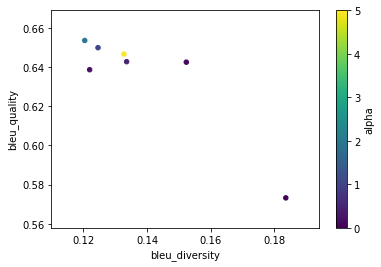

In [4]:
df.plot.scatter(x='bleu_diversity', y='bleu_quality', c='alpha', style='o', colormap='viridis', sharex=False)
plt.savefig(save_dir+'bleu_vs_bleu.png')

In [5]:
import seaborn as sns
sns.set(style='darkgrid')
sns.set_palette("colorblind")
    
metric_names = ['intent accuracy', 'BLEU-quality', 'BLEU-diversity', 'originality']#, 'transfer']

from collections import defaultdict, OrderedDict
avg = defaultdict(list)
for run in runs:
    if run['args']['alpha'] in [0.0, 0.2, 0.5, 1.0, 5.0]:
        alpha = r'$\alpha = {}$'.format(run['args']['alpha'])
        avg[alpha].append([run['delexicalised_metrics']['intent_accuracy']['avg'],              
                       run['delexicalised_metrics']['bleu_scores']['quality']['avg'],  
                       run['delexicalised_metrics']['bleu_scores']['diversity']['avg'],
                       run['delexicalised_metrics']['originality']['avg']])
                       #run['delexicalised_metrics']['transfer']['metric']['avg']])
for alpha, seeds in avg.items():
    avg[alpha] = np.mean(seeds, axis=0)

bar_df_alpha = pd.DataFrame(avg, index=metric_names)

#f, axarr = plt.subplots(1, figsize=(5,4.5))
#bar_df.plot.bar(rot=20, fontsize=14, ax=axarr)

#axarr.legend(fontsize=14)

#plt.savefig(save_dir+'metrics.png')

# TRICHER : Baselines (taken from Stephane's work)

# Attempt to reproduce baselines

In [6]:
results_dir = '/Users/alicecoucke/results_alpha5'
save_dir = '/Users/alicecoucke/results_alpha5/fig'

from pathlib import Path
import shutil
runs = []

for filename in os.listdir(results_dir):
    filepath = Path(results_dir)/Path(filename)
    if filename.endswith('.pkl'):
        runs.append(torch.load(filepath, map_location='cpu'))

#runs = [run for run in runs if (run['args']['none_size'] in [200])]
#runs = [run for run in runs if (run['args']['seed']==1)]
runs = [run for run in runs if (run['args']['cosine_threshold'] in [0.9])]
runs = [run for run in runs if (run['args']['alpha'] in [0.2])]

runs.sort(key = lambda x : x['args']['seed'])
runs.sort(key = lambda x : x['args']['none_size'])
runs.sort(key = lambda x : x['args']['cosine_threshold'])
runs.sort(key = lambda x : x['args']['alpha'])
        
data = {}
for arg_name in runs[0]['args'].keys():
    data[arg_name] = [run['args'][arg_name] for run in runs]
data['pickle']   = np.array([run['args']['pickle'].split('/')[-1].rstrip('.pkl') for run in runs])
    
data['bleu_quality']   = np.array([run['delexicalised_metrics']['bleu_scores']['quality']['avg'] for run in runs])
data['bleu_diversity'] = np.array([run['delexicalised_metrics']['bleu_scores']['diversity']['avg'] for run in runs])
data['accuracy']       = np.array([run['delexicalised_metrics']['intent_accuracy']['avg'] for run in runs])
data['originality']       = np.array([run['delexicalised_metrics']['originality']['avg'] for run in runs])
data['transfer']   = np.array([run['delexicalised_metrics']['transfer']['metric']['avg'] for run in runs])

data['metric'] = data['accuracy']**10 * data['originality'] #* data['bleu_quality']

df = pd.DataFrame(data, columns=['pickle', 'seed', 'dataset_size', 'none_size', 'alpha', 'infersent_selection', 'cosine_threshold',
                                 'bleu_quality', 'bleu_diversity', 'accuracy', 'originality', 'transfer', 'metric'])

df.head(100)

#[run['args']['infersent_selection'] for run in runs]

,pickle,seed,dataset_size,none_size,alpha,infersent_selection,cosine_threshold,bleu_quality,bleu_diversity,accuracy,originality,transfer,metric
0,33596,1,200,0,0.2,no_infersent_selection,0.9,0.695597,0.097320,0.973175,0.126768,0.000000,0.096587
1,24729,2,200,0,0.2,no_infersent_selection,0.9,0.648736,0.079345,0.986802,0.075087,0.008929,0.065745
2,25980,3,200,0,0.2,no_infersent_selection,0.9,0.622088,0.115015,0.980666,0.081547,0.004202,0.067084
3,04726,4,200,0,0.2,no_infersent_selection,0.9,0.616960,0.105921,0.981349,0.105215,0.011209,0.087159
4,31367,5,200,0,0.2,no_infersent_selection,0.9,0.644599,0.088398,0.989763,0.047570,0.000000,0.042919
5,11272,1,200,200,0.2,supervised,0.9,0.598695,0.164555,0.876705,0.255400,0.015557,0.068510
6,32273,1,200,200,0.2,unsupervised,0.9,0.629179,0.120178,0.973151,0.463503,0.125947,0.353065
7,11188,2,200,200,0.2,supervised,0.9,0.585910,0.112260,0.904935,0.301196,0.030211,0.110924
8,33437,2,200,200,0.2,unsupervised,0.9,0.677986,0.105290,0.974549,0.290633,0.078977,0.224585
9,45600,3,200,200,0.2,unsupervised,0.9,0.612014,0.138888,0.959711,0.315233,0.070145,0.208948


In [7]:
metric_names = ['intent accuracy', 'BLEU-quality', 'BLEU-diversity', 'originality']
method_names = {'no_infersent_selection':'no transfer', 'supervised':'pseudo-labelling', 'unsupervised':'query transfer'}

from collections import defaultdict, OrderedDict
avg = defaultdict(list)

for run in runs:
    method = method_names[run['args']['infersent_selection']]
    avg[method].append([run['delexicalised_metrics']['intent_accuracy']['avg'],              
                   run['delexicalised_metrics']['bleu_scores']['quality']['avg'],  
                   run['delexicalised_metrics']['bleu_scores']['diversity']['avg'],
                   run['delexicalised_metrics']['originality']['avg']])
for method, seeds in avg.items():
    avg[method] = np.mean(seeds, axis=0)
    
bar_df_baseline = pd.DataFrame(avg, index=metric_names)

## MAKE THE PLOT
#import seaborn as sns
#sns.set(style='darkgrid')
#sns.set_palette("colorblind")
#f, axarr = plt.subplots(1, figsize=(5,4))
#df.plot.bar(rot=20, ax=axarr, fontsize=14)

#axarr.legend(fontsize=14)
#plt.tight_layout()
#plt.savefig(save_dir+'baseline_all.png')

# Varying the reservoir's size

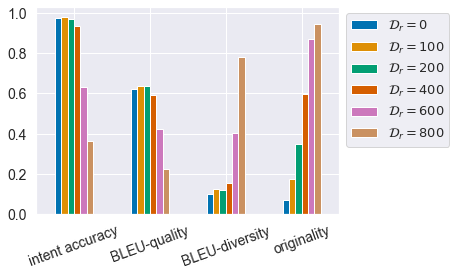

In [8]:
results_dir = '/Users/alicecoucke/results_varydr'
save_dir = '/Users/alicecoucke/results_varydr/fig'

from pathlib import Path
import shutil
runs = []

for filename in os.listdir(results_dir):
    filepath = Path(results_dir)/Path(filename)
    if filename.endswith('.pkl'):
        runs.append(torch.load(filepath, map_location='cpu'))

        
metric_names = ['intent accuracy', 'BLEU-quality', 'BLEU-diversity', 'originality']

from collections import defaultdict, OrderedDict

def plot_dr(runs, alpha):
    avg = defaultdict(list)
    runs = [run for run in runs if (run['args']['alpha'] in [alpha])]

    runs.sort(key = lambda x : x['args']['seed'])
    runs.sort(key = lambda x : x['args']['none_size'])
    runs.sort(key = lambda x : x['args']['cosine_threshold'])
    runs.sort(key = lambda x : x['args']['alpha'])
    
    for run in runs:
        dr_size = run['args']['none_size']
        if dr_size in [0, 100, 200, 400, 600, 800]:
            dr_size_label = r"$\mathcal{D}_r="+str(dr_size)+"$"
            avg[dr_size_label].append([run['delexicalised_metrics']['intent_accuracy']['avg'],              
                run['delexicalised_metrics']['bleu_scores']['quality']['avg'],  
                run['delexicalised_metrics']['bleu_scores']['diversity']['avg'],
                run['delexicalised_metrics']['originality']['avg']]
            )
        

    for dr_size, seeds in avg.items():
        avg[dr_size] = np.mean(seeds, axis=0)
    
    df = pd.DataFrame(avg, index=metric_names)
    
    # MAKE THE PLOT
    f, axarr = plt.subplots(1, figsize=(6.5,4))
    df.plot.bar(rot=20, ax=axarr, fontsize=14)
    axarr.legend(fontsize=13, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig(save_dir+'none_size.png')
    
    return df

bar_df_dr=plot_dr(runs, alpha=0.2)

## General Plot

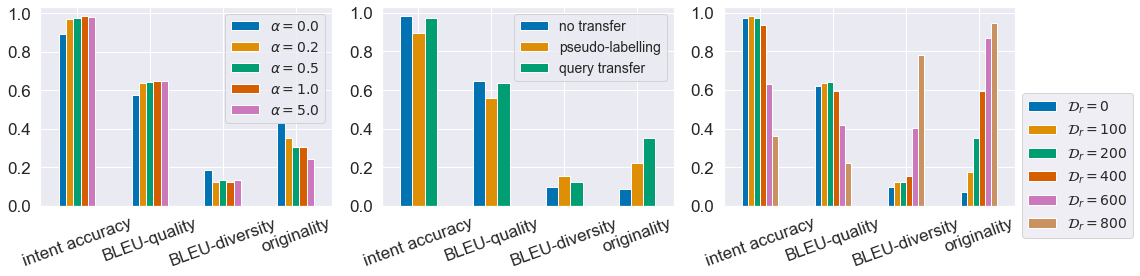

In [9]:
f, axarr = plt.subplots(1, 3, figsize=(16,4))#, gridspec_kw={'width_ratios': [1.5, 1.5, 2]})

bar_df_alpha.plot.bar(rot=20, ax=axarr[0], fontsize=17)
axarr[0].legend(fontsize=14)

bar_df_baseline.plot.bar(rot=20, ax=axarr[1], fontsize=17)
axarr[1].legend(fontsize=14)

bar_df_dr.plot.bar(rot=20, ax=axarr[2], fontsize=17)
axarr[2].legend(fontsize=14, bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.savefig('/Users/alicecoucke/Desktop/plots_acl/'+'all.png')

## Generated patterns